## Supervised Learning Project for suggesting best model for Bank Personal loan using  Logistic, K-NN and Naïve Bayes models.

In [699]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from scipy.stats import zscore


In [700]:
#read data from csv file
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [701]:
#Shape (Rows & columns) in file
data.shape

(5000, 14)

In [702]:
#columns in given file
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [703]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [704]:
#checking null values in columns
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [705]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


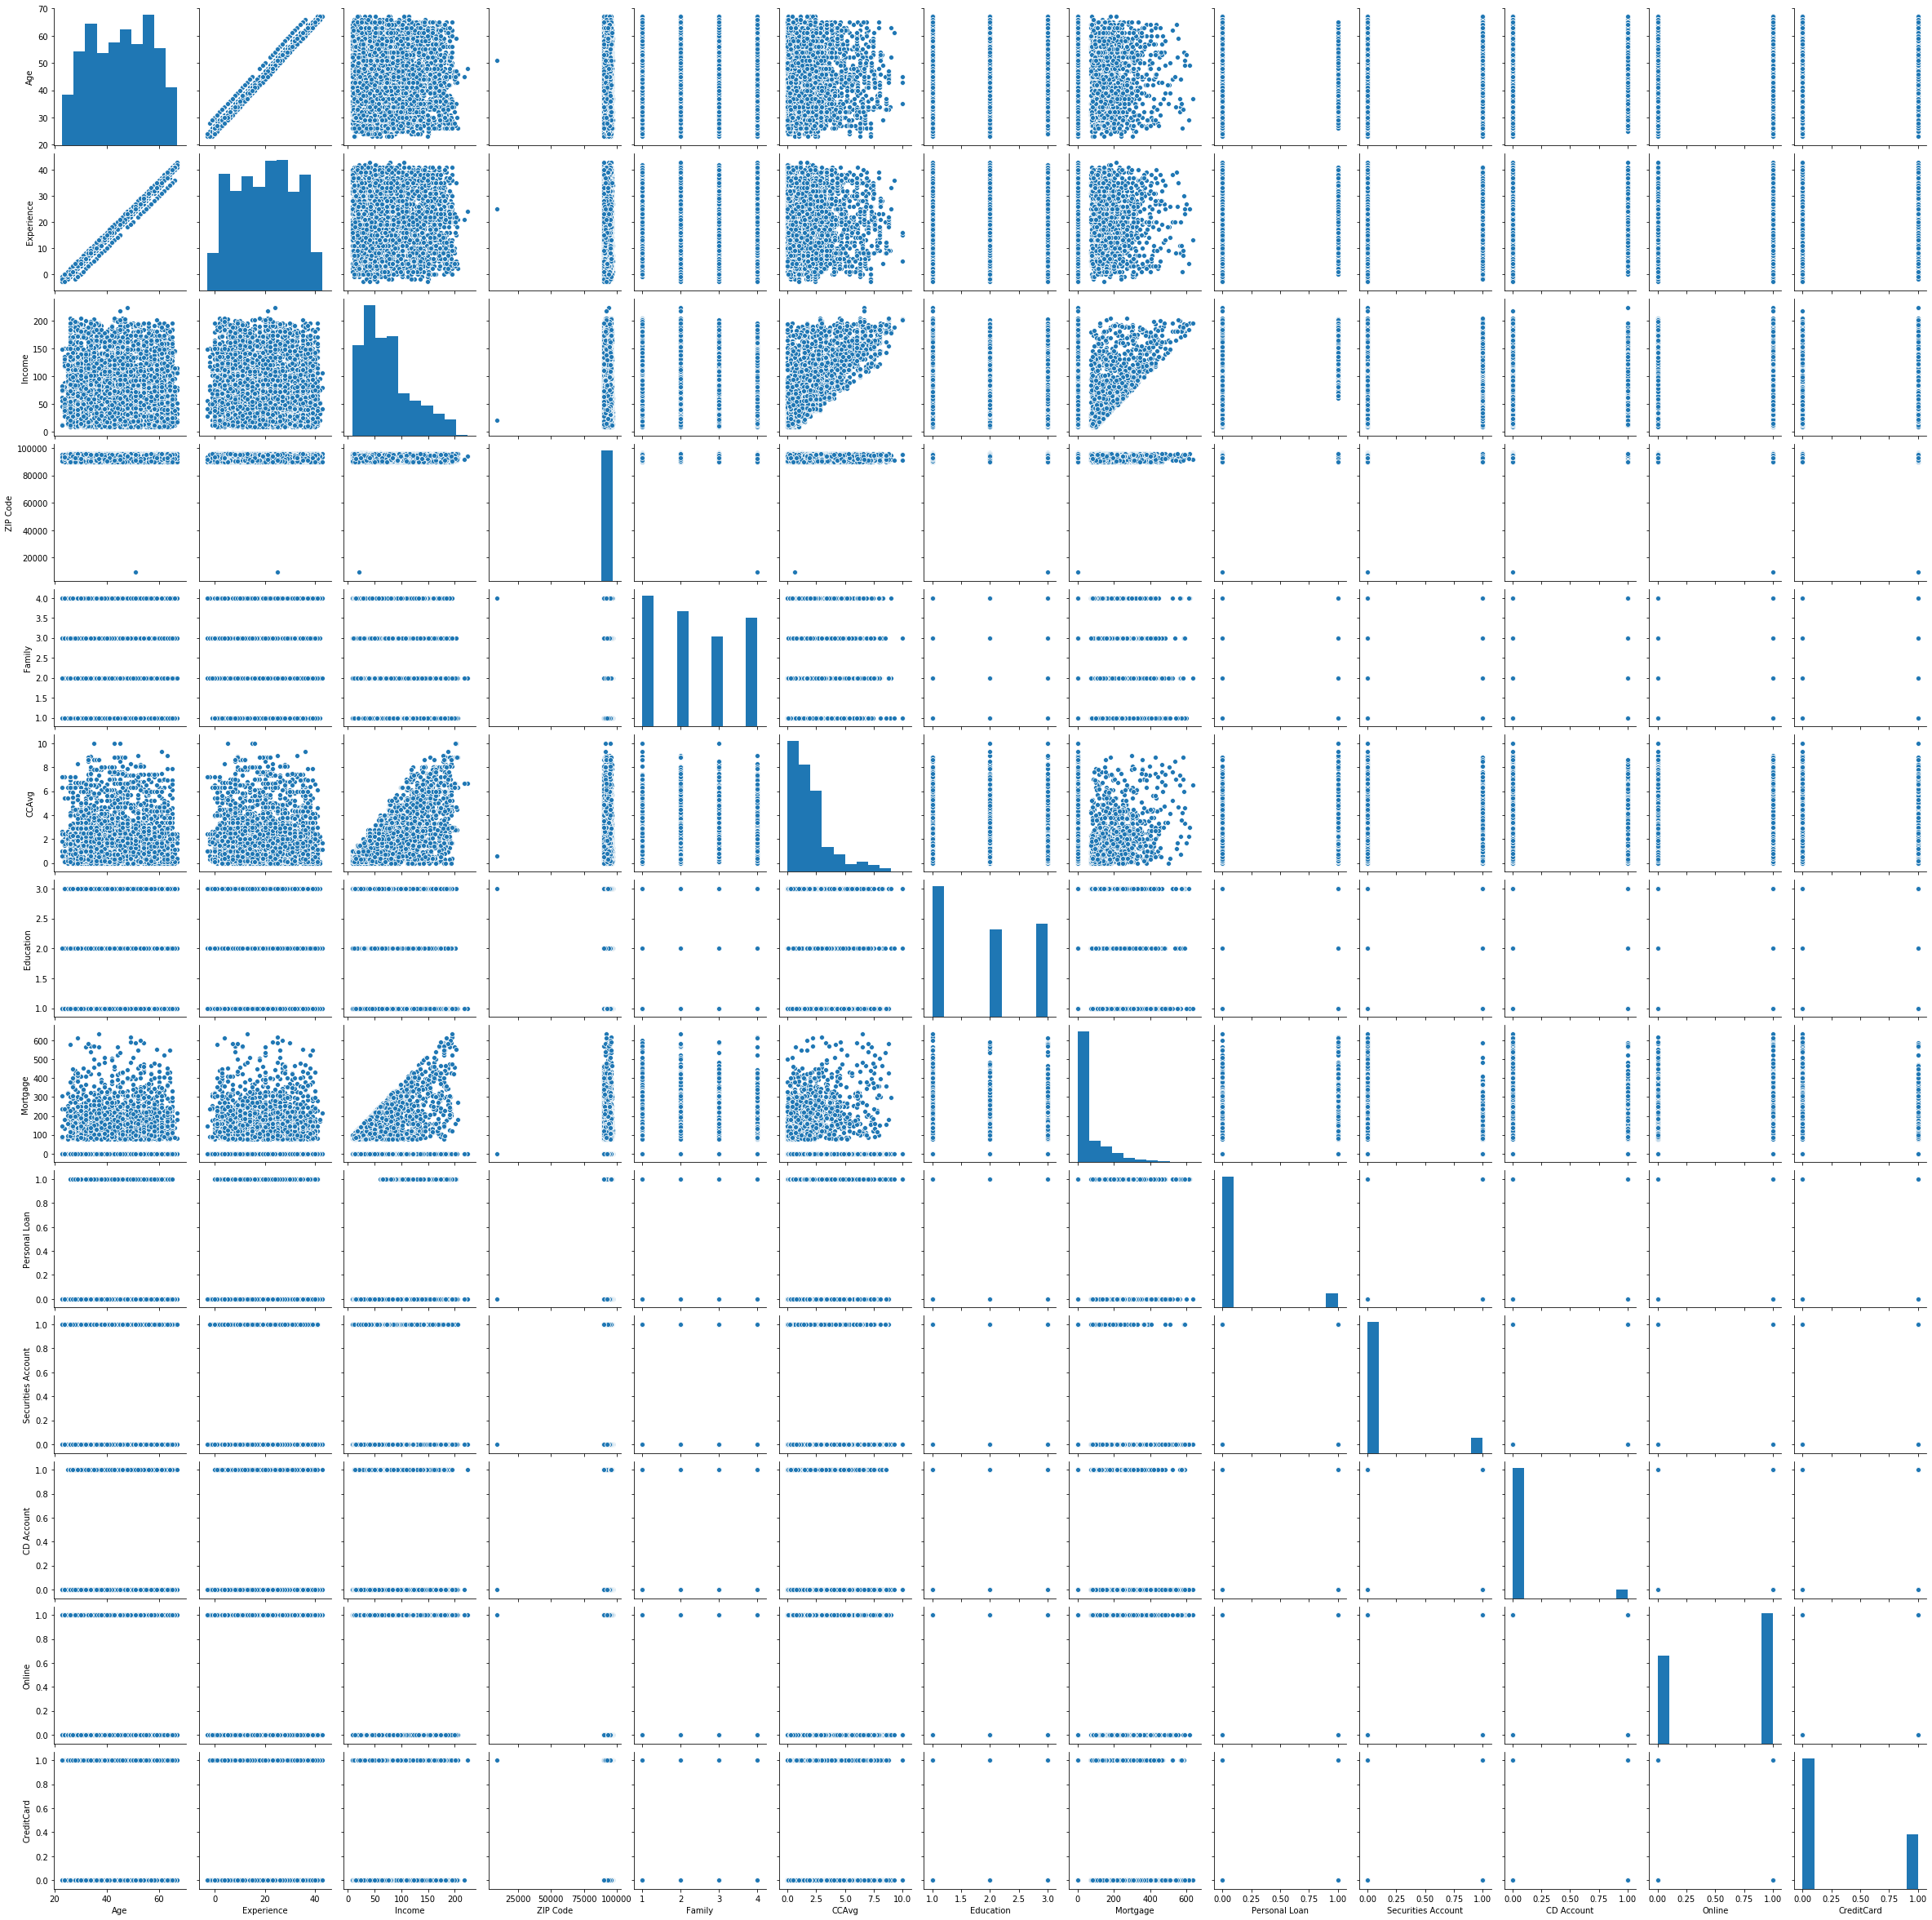

In [706]:
sns.pairplot(data.iloc[:,1:])
plt.show()

In [707]:
#Negative Experience records.Before proceeding further We need to clean them
data[data['Experience']<0]['Experience'].count()

52

In [708]:
#Clean Negative Experience records
positiveExp= data.loc[data['Experience']> 0]
negExp = data.Experience < 0
mylist = data.loc[negExp]['ID'].tolist()
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [709]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]['Age'].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]['Education'].tolist()[0]
    df_filter = positiveExp[(positiveExp.Age == age) & (positiveExp.Education == education)]
    
    exp = df_filter['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index,'Experience'] = exp                     
                   

In [710]:
#Checking if there are records with negative experience
data[data['Experience']<0]['Experience'].count()

0

In [711]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Influence of income and education on personal loan

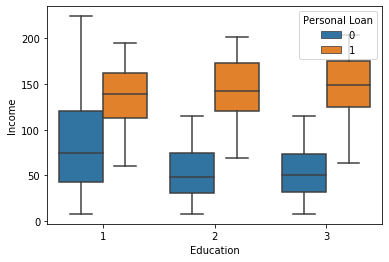

In [712]:
#Relationship/Influence of Education,Income on personal loan
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)
plt.show()

### It seems customers belonging to education level 1 have higher income.Customers who has taken personal loan have same income levels.

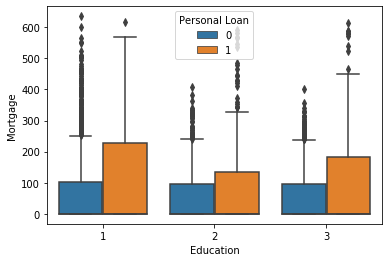

In [713]:
#Relationship/Influence of Education,Mortgage on personal loan
sns.boxplot(x='Education',y='Mortgage',hue='Personal Loan',data=data)
plt.show()

### From the above chart it seems that mortgage is high .It does not depend on wheater person has taken personal loan or not.

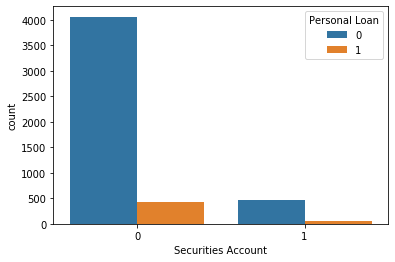

In [714]:
#Relationship/Influence of Securities Account on personal loan
sns.countplot(x='Securities Account',data=data,hue='Personal Loan')
plt.show()

### Observation ->Majority of customers who does not have loan have securities account

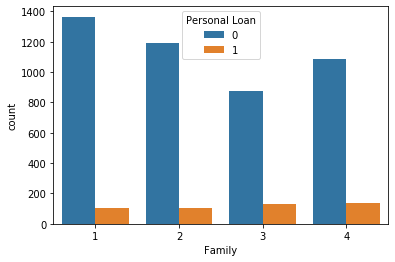

In [715]:
#Relationship/Influence of Family size on personal loan
sns.countplot(x='Family',data=data,hue='Personal Loan')
plt.show()

### Observation -> Family size does not have impact on personal loan.But seems family size 3 and 4 are more likely to take personal loan than family size 1 and 2.

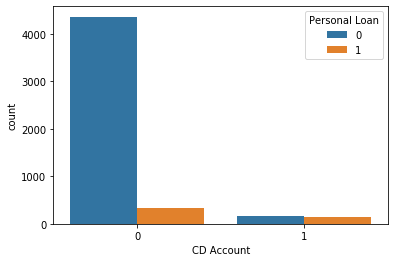

In [716]:
#Relationship/Influence of CD account on personal loan
sns.countplot(x='CD Account',data=data,hue='Personal Loan')
plt.show()

### Observation -> Majority of customers who don;t have CD account ,doesn;t have loan.Almost all customers who holds CD account have personal loan.

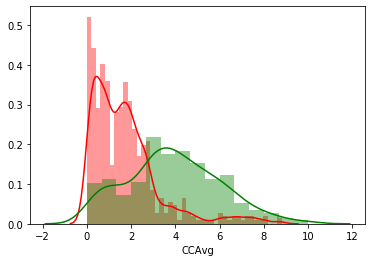

In [717]:
#Relationship/Influence of Credit card on personal loan
sns.distplot(data[data['Personal Loan'] == 0]['CCAvg'],color = 'r')
sns.distplot(data[data['Personal Loan'] == 1]['CCAvg'],color = 'g')
plt.show()

In [718]:
print('Credit card spending of Non-Personal loan customers: ',data[data['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Personal Loan customers: ',data[data['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Personal loan customers:  1400.0
Credit card spending of Personal Loan customers:  3800.0


### Observation -> Credit Card Spending 
The graph shows persons who have personal loan have higher credit card average.Average credit card spending with median of 3800.0 indicates a higher probability of personal loan.Lower credit card spending with a median of 1400 is less likely to take loan.This could be useful information.

#correlation & Heatmap

In [719]:
corr = data.corr()
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009308,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994159,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009308,0.994159,1.000000,-0.048095,-0.030649,-0.049420,-0.047694,0.013075,-0.012935,-0.011498,0.001059,0.007381,0.014501,0.007935
Income,-0.017695,-0.055269,-0.048095,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.030649,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.049420,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.047694,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013075,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.012935,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.011498,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


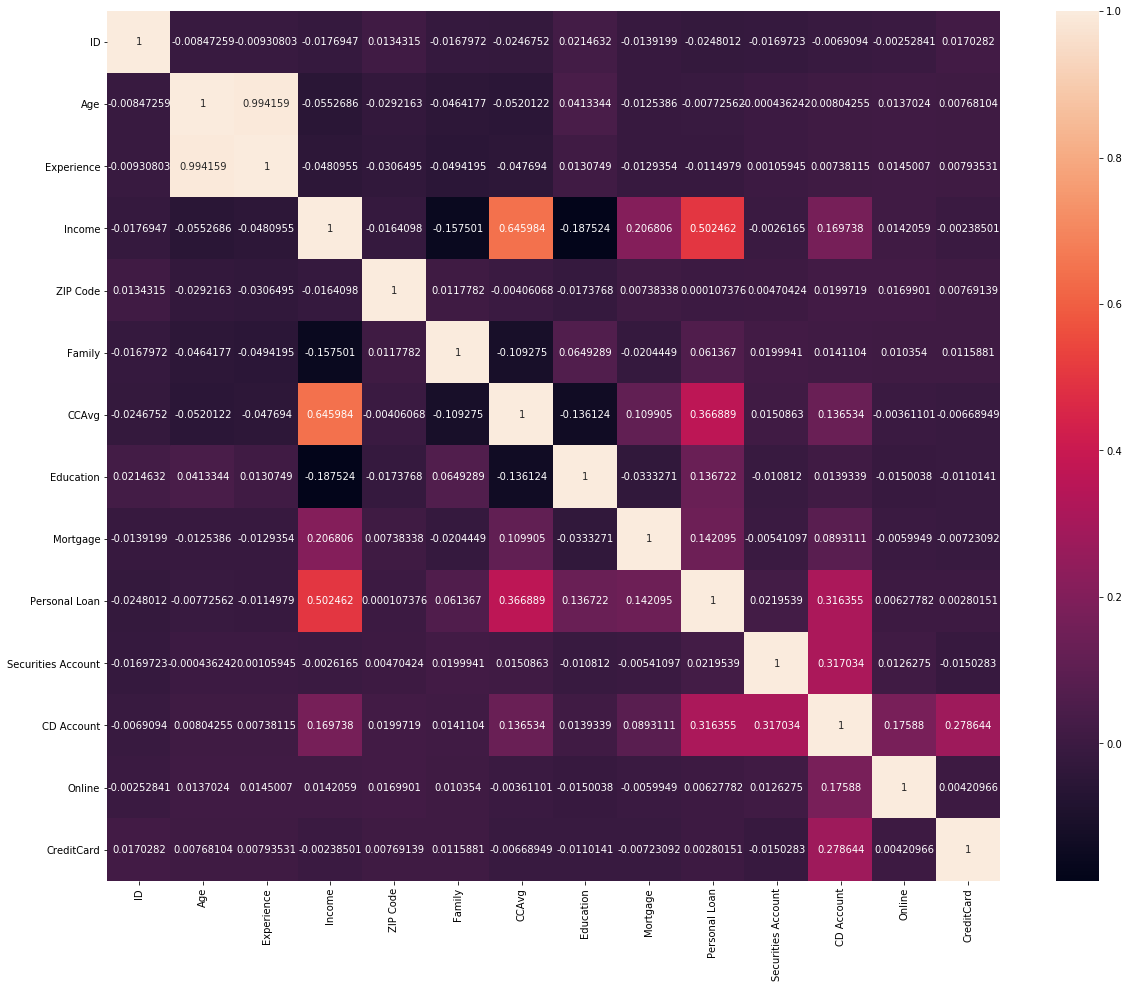

In [720]:
plt.figure(figsize = (20,16))
sns.heatmap(corr, annot=True ,fmt='g')
plt.show()

In [721]:
X = data.drop(['ID','Experience','Personal Loan'],axis=1)
Y = data['Personal Loan']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [722]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))


70.00% data is in training set
30.00% data is in test set


## Logistic Regression Model

In [723]:
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [724]:
logistic_model_train_score=logistic_model.score(x_train,y_train)
print()
print("Logistics regression train data value: {}".format(logistic_model_train_score))
print()


Logistics regression train data value: 0.9094285714285715



In [725]:
logistic_model_test_score=logistic_model.score(x_test,y_test)
print()
print("Logistics regression test data value: {}".format(logistic_model_test_score))
print()


Logistics regression test data value: 0.9073333333333333



## KNN Model

In [726]:
scores =[]
for k in range(1,100):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train)
    scores.append(NNH.score(x_test, y_test))

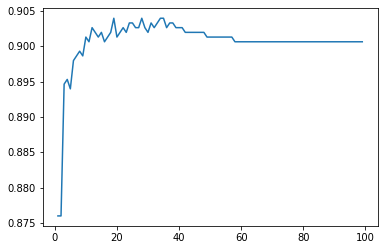

In [727]:
plt.plot(range(1,100),scores)
plt.show()

In [728]:
knn = KNeighborsClassifier(n_neighbors= 20 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)
knn.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [729]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [730]:
knn_train_predict = knn.predict(x_train)
knn_train_accuracy = accuracy_score(y_train, knn_train_predict)

print()
print("knn Model Accuracy for training data : {}".format(knn_train_accuracy))
print()


knn Model Accuracy for training data : 0.9051428571428571



In [731]:
knn_test_predicted = knn.predict(x_test)
knn_test_accuracy = accuracy_score(y_test, knn_test_predicted)

print()
print("KNN Model Accuracy for testing data : {}".format(knn_test_accuracy))
print()


KNN Model Accuracy for testing data : 0.9006666666666666



## Naive Bayes

In [732]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [733]:
nb_train_predict = naive_bayes_model.predict(x_train)
nb_train_accuracy = accuracy_score(y_train, nb_train_predict)


print()
print("NB Model Accuracy for training data : {}".format(nb_train_accuracy))
print()


NB Model Accuracy for training data : 0.8948571428571429



In [734]:
nb_test_predict = naive_bayes_model.predict(x_test)
nb_test_accuracy = accuracy_score(y_test, nb_test_predict)

print()
print("NB Model Accuracy for testing data : {}".format(nb_test_accuracy))
print()


NB Model Accuracy for testing data : 0.8833333333333333



### Model test data Summary

In [735]:
print("Logistics regression test data value: {}".format(logistic_model_test_score))
print("KNN Model Accuracy for testing data : {}".format(knn_test_accuracy))
print("NB Model Accuracy for testing data : {}".format(nb_test_accuracy))

Logistics regression test data value: 0.9073333333333333
KNN Model Accuracy for testing data : 0.9006666666666666
NB Model Accuracy for testing data : 0.8833333333333333


### Observation -> KNN gives highest value , hence KNN is best model

### Logistics Regression Confusion Matrix

Logistics Regression Confusion Matrix


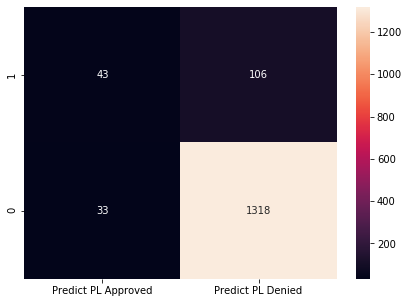

In [736]:
logistic_test_predict = logistic_model.predict(x_test)

print("Logistics Regression Confusion Matrix")

cm=metrics.confusion_matrix(y_test,logistic_test_predict,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                   columns=[i for i in ["Predict PL Approved","Predict PL Denied"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

### Naive Bayes Confusion matrix

Naive Bayes Confusion Matrix


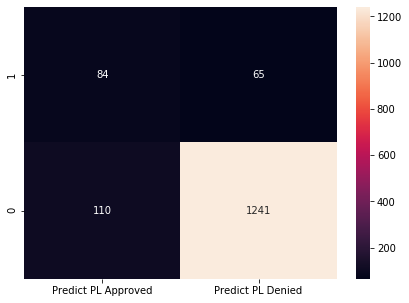

In [737]:
print("Naive Bayes Confusion Matrix")
cm_nb=metrics.confusion_matrix(y_test, nb_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm_nb, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict PL Approved","Predict PL Denied"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

### KNN confusion matrix

KNN Confusion Matrix


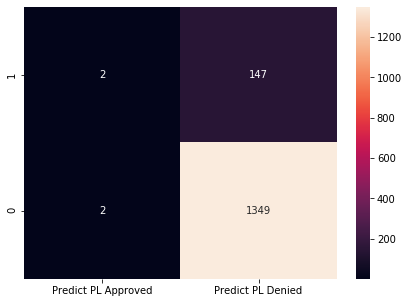

In [738]:
print("KNN Confusion Matrix")
cm_knn=metrics.confusion_matrix(y_test, knn_test_predicted, labels=[1, 0])

df_cm = pd.DataFrame(cm_knn, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict PL Approved","Predict PL Denied"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

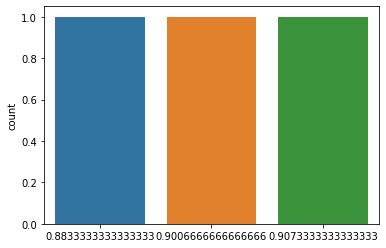

In [739]:
model_data = [logistic_model_test_score,knn_test_accuracy,nb_test_accuracy]

series = pd.Series(data=model_data,index=['Logistic','KNN', 'Naive Bayes'])

sns.countplot(series)
plt.show()


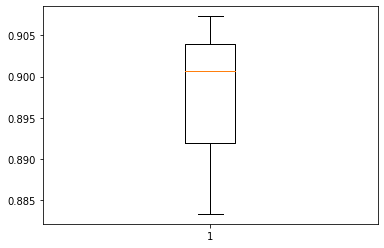

Minimum Value : 0.8833333333333333
Median Value : 0.9006666666666666
Max Value : 0.9073333333333333

Suggested Best model is : Logistic    0.907333
dtype: float64



In [740]:
plt.boxplot(model_data)
plt.show()
print("Minimum Value : {}".format(series.min()))
print("Median Value : {}".format(series.median()))
print("Max Value : {}".format(series.max()))

print()
print("Suggested Best model is : {}".format(series[[series.idxmax()]]))
print()